In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [7]:
india_json_data = requests.get('https://raw.githubusercontent.com/ammishra08/COVID-19/master/covid_19_datasets/covid19_india/india_statewise.json').json()

In [8]:
india_json_data

{'success': True,
 'data': {'source': 'covid19india.org',
  'lastRefreshed': '2020-05-03T03:30:20.698Z',
  'total': {'confirmed': 39699,
   'recovered': 10828,
   'deaths': 1323,
   'active': 27544},
  'statewise': [{'state': 'Maharashtra',
    'confirmed': 12296,
    'recovered': 2000,
    'deaths': 521,
    'active': 9775},
   {'state': 'Gujarat',
    'confirmed': 5054,
    'recovered': 896,
    'deaths': 262,
    'active': 3896},
   {'state': 'Delhi',
    'confirmed': 4122,
    'recovered': 1256,
    'deaths': 64,
    'active': 2802},
   {'state': 'Madhya Pradesh',
    'confirmed': 2788,
    'recovered': 622,
    'deaths': 151,
    'active': 2015},
   {'state': 'Rajasthan',
    'confirmed': 2772,
    'recovered': 1242,
    'deaths': 68,
    'active': 1462},
   {'state': 'Tamil Nadu',
    'confirmed': 2757,
    'recovered': 1341,
    'deaths': 29,
    'active': 1387},
   {'state': 'Uttar Pradesh',
    'confirmed': 2487,
    'recovered': 698,
    'deaths': 43,
    'active': 1746},
   

In [9]:
df_india = pd.io.json.json_normalize(india_json_data['data']['statewise'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [10]:
df_india

,state,confirmed,recovered,deaths,active
0,Maharashtra,12296,2000,521,9775
1,Gujarat,5054,896,262,3896
2,Delhi,4122,1256,64,2802
3,Madhya Pradesh,2788,622,151,2015
4,Rajasthan,2772,1242,68,1462
5,Tamil Nadu,2757,1341,29,1387
6,Uttar Pradesh,2487,698,43,1746
7,Andhra Pradesh,1525,441,33,1051
8,Telangana,1061,499,29,533
9,West Bengal,795,139,48,608


In [11]:
df_india.set_index('state', inplace = True)

In [12]:
df_india

,confirmed,recovered,deaths,active
state,,,,
Maharashtra,12296,2000,521,9775
Gujarat,5054,896,262,3896
Delhi,4122,1256,64,2802
Madhya Pradesh,2788,622,151,2015
Rajasthan,2772,1242,68,1462
Tamil Nadu,2757,1341,29,1387
Uttar Pradesh,2487,698,43,1746
Andhra Pradesh,1525,441,33,1051
Telangana,1061,499,29,533


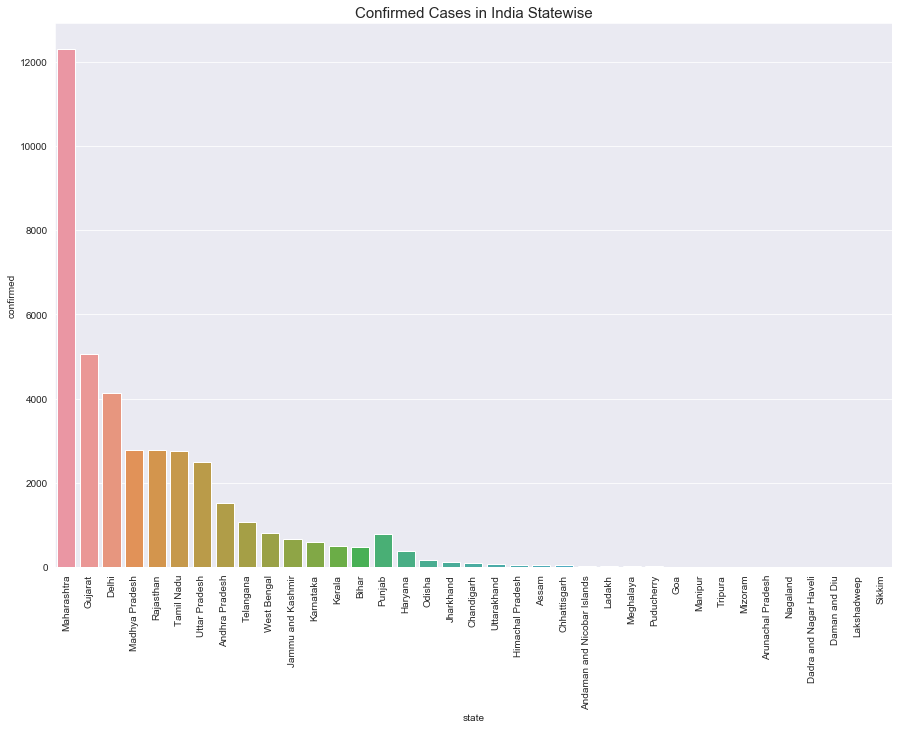

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.barplot(x = df_india.index, y = df_india['confirmed'])
plt.title('Confirmed Cases in India Statewise', size = 15)
plt.xticks(rotation = 90)
plt.show()

In [20]:
import plotly.express as px
figure = px.bar(df_india, x = df_india.index, height = 800, width = 1000, y = 'confirmed', color='confirmed')
figure.show()

In [21]:
location = {
    "Sikkim": [27.5330,88.5122],
    "Maharashtra" : [19.7515,75.7139],
    "West Bengal": [22.9868,87.8550],
    "Chandigarh":[30.7333,76.7794],
    "Karnataka": [15.3173,75.7139],
    "Telangana": [18.1124,79.0193],
    "Uttar Pradesh": [26.8467,80.9462],
    "Gujarat":[22.2587,71.1924],
     "Odisha":[20.9517,85.0985],
    "Delhi" : [28.7041,77.1025],
    "Tamil Nadu": [11.1271,78.6569],
    "Haryana": [29.0588,76.0856],
    "Madhya Pradesh":[22.9734,78.6569],
    "Kerala" : [10.8505,76.2711],
    "Rajasthan": [27.0238,74.2179],
    "Jammu and Kashmir":[33.7782,76.5762],
    "Ladakh": [34.1526,77.5770],
    "Andhra Pradesh":[15.9129,79.7400],
    "Bihar": [25.0961,85.3131],
    "Chhattisgarh":[21.2787,81.8661],
    "Uttarakhand":[30.0668,79.0193],
    "Himachal Pradesh":[31.1048,77.1734],
    "Goa": [15.2993,74.1240],
    "Tripura":[23.9408,91.9882],  
    "Andaman and Nicobar Islands": [11.7401,92.6586],
    "Puducherry":[11.9416,79.8083],
    "Manipur":[24.6637,93.9063],
    "Mizoram":[23.1645,92.9376],
    "Assam":[26.2006,92.9376],
    "Meghalaya":[25.4670,91.3662],   
    "Arunachal Pradesh":[28.2180,94.7278],
    "Jharkhand" : [23.6102,85.2799],
    "Nagaland": [26.1584,94.5624],
    "Punjab":[31.1471,75.3412], 
    "Dadra and Nagar Haveli":[20.1809,73.0169],
    "Lakshadweep":[10.5667,72.6417],
    "Daman and Diu":[20.4283,72.8397] 
}

In [22]:
df_india ['Lat'] = ""
df_india ['Long'] = ""

for index in df_india.index:
    df_india.loc[df_india.index == index, "Lat"] = location [index][0]
    df_india.loc[df_india.index == index, "Long"] = location [index][1]  

In [23]:
df_india

,confirmed,recovered,deaths,active,Lat,Long
state,,,,,,
Maharashtra,12296,2000,521,9775,19.7515,75.7139
Gujarat,5054,896,262,3896,22.2587,71.1924
Delhi,4122,1256,64,2802,28.7041,77.1025
Madhya Pradesh,2788,622,151,2015,22.9734,78.6569
Rajasthan,2772,1242,68,1462,27.0238,74.2179
Tamil Nadu,2757,1341,29,1387,11.1271,78.6569
Uttar Pradesh,2487,698,43,1746,26.8467,80.9462
Andhra Pradesh,1525,441,33,1051,15.9129,79.74
Telangana,1061,499,29,533,18.1124,79.0193


In [42]:
import folium
india_map = folium.Map(location= [10, 80], zoom_start=4, max_zoom=8, height=1000, width='100%', tiles='CartoDB dark_matter')
for i in range(0, len(df_india)):
    folium.Circle(location= [df_india.iloc[i]['Lat'], df_india.iloc[i]['Long']],
                 radius=(int(np.log2(df_india.iloc[i]['confirmed']+1.00001)))*13000,
                  tooltip= "<h5 style='text-align:center;font-weight: bold'>"+ df_india.iloc[i].name +"</h5>"+
        "<li>Confirmed "+str(df_india.iloc[i]['confirmed'])+"</li>"+
        "<li>Deaths   "+str(df_india.iloc[i]['deaths'])+"</li>"+
        "<li>Active   "+str(df_india.iloc[i]['active'])+"</li>"+          
        "</ul>",
                 color = 'red',
                  fill = True).add_to(india_map)
india_map